<a href="https://colab.research.google.com/github/emaudealtema/Data-Mining/blob/main/Iris_clustering_hi%C3%A8rarchique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import scale
import sklearn.metrics as sm
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, classification_report,davies_bouldin_score, pairwise_distances
import plotly.graph_objs as go
import plotly as py
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from plotly import *

In [10]:
#Charger les donnees, faire la mise à l'echelle et forme un dataframe avec les variables cibles
iris = datasets.load_iris()
x = scale(iris.data)
y = pd.DataFrame(iris.target)
variables_name = iris.feature_names
x[0:10,]


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [11]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
df = pd.DataFrame(iris.data)
df.head(5)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
features = pd.DataFrame(iris.feature_names)
features

,0
0,sepal length (cm)
1,sepal width (cm)
2,petal length (cm)
3,petal width (cm)


In [15]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length','Petal_width']
y.columns = ['Targets']

iris_df   

,Sepal_Length,Sepal_Width,Petal_Length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
iris_df.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_width     0
dtype: int64

In [17]:
iris_df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# pour les valeurs manquantes
iris_df.fillna(method ='ffill', inplace = True)

In [19]:
# Mise à l'échelle
scaler = StandardScaler()
iris_df_scaled = scaler.fit_transform(df)

In [20]:
iris_df_normalized = normalize(iris_df_scaled)

In [21]:
df = pd.DataFrame(iris_df_normalized)
df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length','Petal_width']
y.columns = ['Targets']
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_width
0,-0.388449,0.439479,-0.578017,-0.567329
1,-0.518990,-0.059926,-0.608534,-0.597281
2,-0.579791,0.137446,-0.584692,-0.550533
3,-0.633421,0.041296,-0.539604,-0.553082
4,-0.412678,0.504495,-0.541256,-0.531247
...,...,...,...,...
145,0.527939,-0.067126,0.416854,0.736890
146,0.304547,-0.706126,0.388530,0.507623
147,0.510105,-0.084612,0.525444,0.675679
148,0.222309,0.405768,0.480080,0.745288


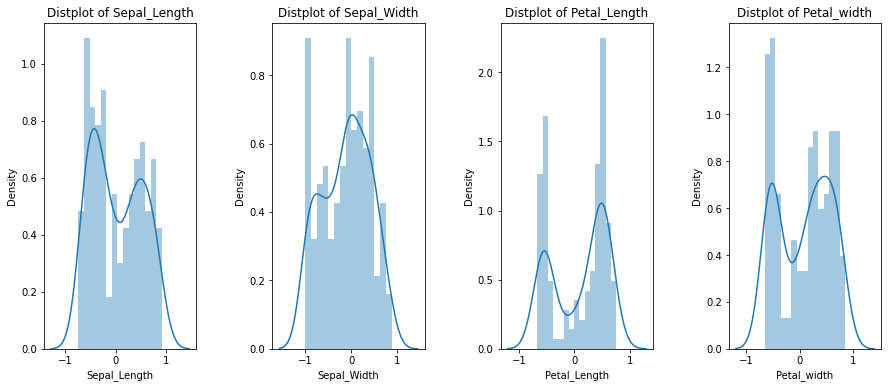

In [22]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Sepal_Length' , 'Sepal_Width','Petal_Length', 'Petal_width']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

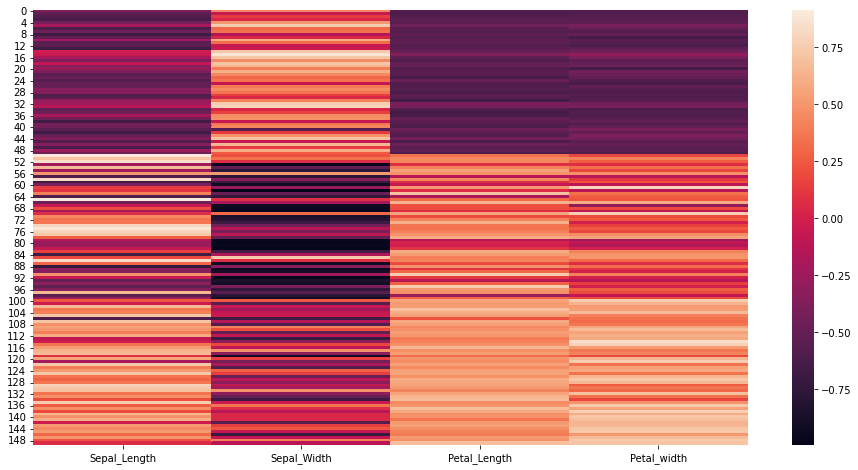

In [26]:
#Le heatmap est une representation qui nous montre un phenonmene dans nos donnees
plt.figure(1, figsize = (16 ,8))
sns.heatmap(df)
plt.show()

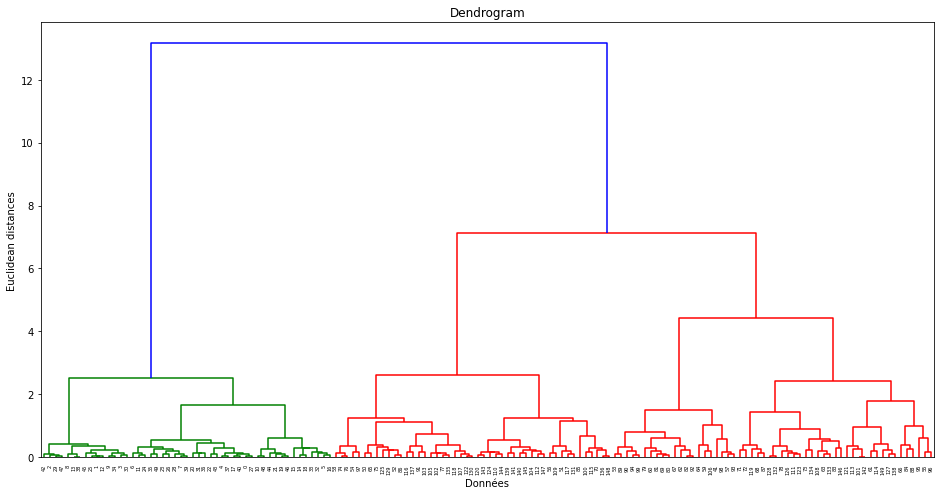

In [27]:

plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward", metric = "euclidean"))

plt.title('Dendrogram')
plt.xlabel('Données')
plt.ylabel('Euclidean distances')
plt.show()

#  Explication du dendrogramme, 
###les point en dessous sont des clusters qui forment des clusters a chaque rencontre de chhaque deux arcs qui a la fin vont former un unique clauster au niveau du point de rencontre des deux derniers arcs

In [98]:
# definition du clustering utilisant la methode AffinityClustering, il prend 3 parametre, n_cluster = nbre de clustering, affinity = distance
#entre les points a qui on peut donner la distance euclidienne, ou de Mannhathan ou cosine et linkage = distance entre les clusters qui prend 
# comme valeur soit la methode ward, average ou complete
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='average')

y_hc = hc.fit_predict(df)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [99]:
df['cluster'] = pd.DataFrame(y_hc)

In [100]:
silhouette_score(df, y_hc)

0.7055153996049148

In [101]:
from plotnine import *

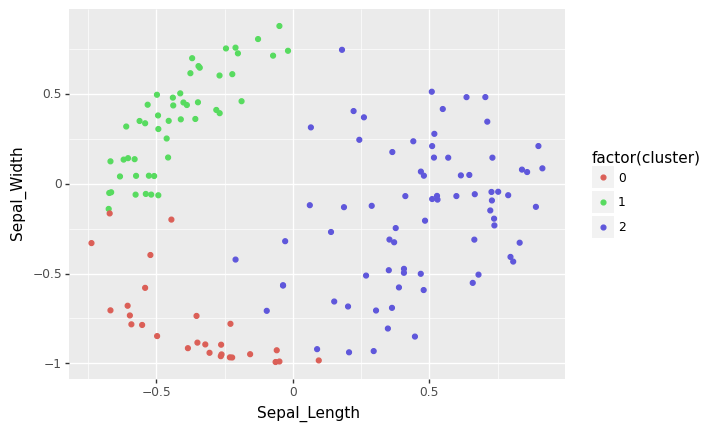

<ggplot: (8790990617765)>

In [102]:
df['cluster2']= y_hc
(ggplot(df, aes(x = 'Sepal_Length' , y= 'Sepal_Width', z = 'Sepal_Length', color = "factor(cluster)")) + geom_point())

En utilisation normale, l'indice Calinski-Harabasz est appliqué aux résultats d'une analyse de cluster.
Indice Calinski-Harabasz
Si les étiquettes de vérité de terrain ne sont pas connues, l'indice Calinski-Harabasz (sklearn.metrics.calinski_harabasz_score) - également connu sous le nom de critère du rapport de variance - peut être utilisé pour évaluer le modèle, où un score Calinski-Harabasz plus élevé se rapporte à un modèle avec clusters mieux définis.
L'indice est le rapport de la somme de la dispersion inter-clusters et de la dispersion intra-cluster pour tous les clusters (où la dispersion est définie comme la somme des distances au carré).
Avantages
Le score est plus élevé lorsque les clusters sont denses et bien séparés, ce qui correspond à un concept standard de cluster.
Le score est rapide à calculer

In [151]:
# Metric calinski_harabasz_score
sm.calinski_harabasz_score(df, y_hc)


646.4850815603688

Dans cette section j'essaie le meme algo mais je vais evaluer d'une autre maniere avec la meme metric

In [108]:
#Reducing the dimensionality of the Data

pca = PCA(n_components = 2)
df_principal = pca.fit_transform(iris_df_normalized)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['Petal_Length', 'Petal_Width']

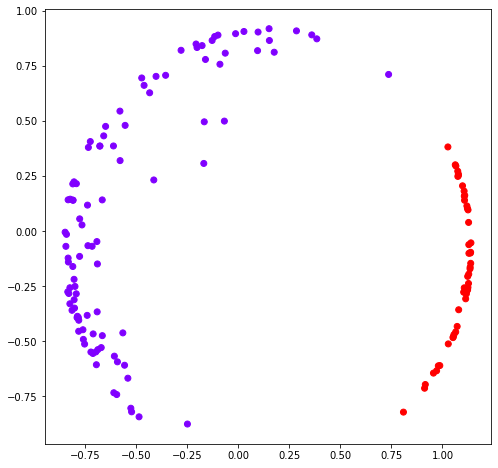

In [111]:
#K = ( On note que AgglomerativeClutering prend 3 parametres n_clusters = nombre de cluster, affinity = distance entre 2 points  souvent on utilise
#euclidean mais il pouvait cosine ou la distance de mannhathan # et linkage qui prend ward methode comme distance entre 2 clusters
ac2 = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward')
  
# Visualizing the clustering
plt.figure(figsize =(8, 8))
plt.scatter(df_principal['Petal_Length'], df_principal['Petal_Width'], 
           c = ac2.fit_predict(df_principal), cmap ='rainbow')
plt.show()

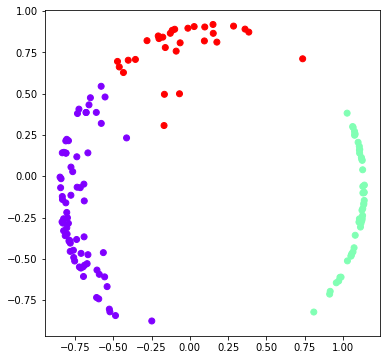

In [114]:
ac3 = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(df_principal['Petal_Length'], df_principal['Petal_Width'], 
           c = ac3.fit_predict(df_principal), cmap ='rainbow')
plt.show()

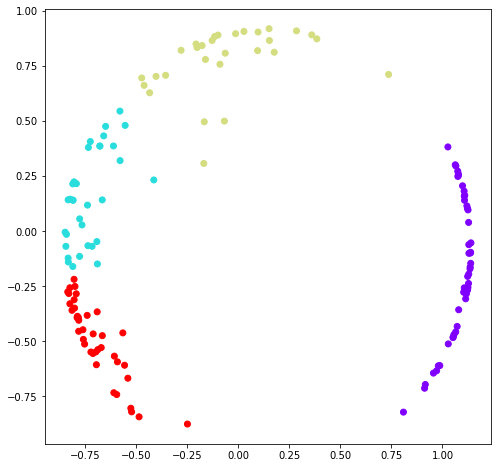

In [115]:
ac4 = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward')
  
# Visualizing the clustering
plt.figure(figsize =(8, 8))
plt.scatter(df_principal['Petal_Length'], df_principal['Petal_Width'], 
           c = ac4.fit_predict(df_principal), cmap ='rainbow')
plt.show()

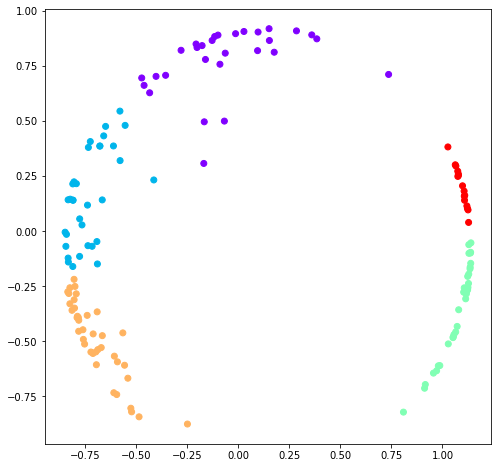

In [116]:
ac5 = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage='ward')
  
# Visualizing the clustering
plt.figure(figsize =(8, 8))
plt.scatter(df_principal['Petal_Length'], df_principal['Petal_Width'], 
           c = ac5.fit_predict(df_principal), cmap ='rainbow')
plt.show()

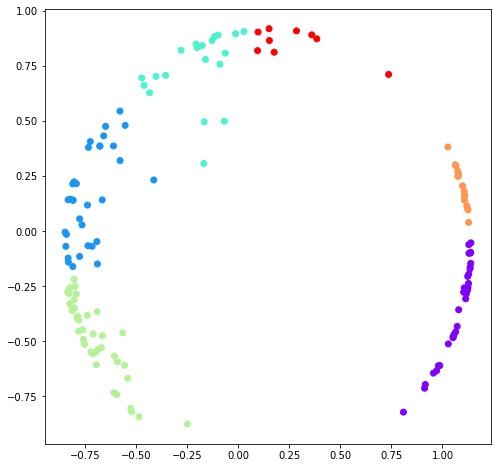

In [117]:
ac6 = AgglomerativeClustering(n_clusters = 6, affinity='euclidean', linkage='ward')
  
# Visualizing the clustering
plt.figure(figsize =(8, 8))
plt.scatter(df_principal['Petal_Length'], df_principal['Petal_Width'], 
           c = ac6.fit_predict(df_principal), cmap ='rainbow')
plt.show()

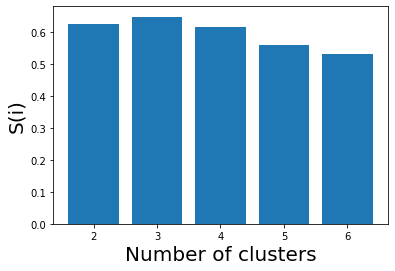

In [118]:
k = [2, 3, 4, 5, 6]
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(df_principal, ac2.fit_predict(df_principal)))
silhouette_scores.append(
        silhouette_score(df_principal, ac3.fit_predict(df_principal)))
silhouette_scores.append(
        silhouette_score(df_principal, ac4.fit_predict(df_principal)))
silhouette_scores.append(
        silhouette_score(df_principal, ac5.fit_predict(df_principal)))
silhouette_scores.append(
        silhouette_score(df_principal, ac6.fit_predict(df_principal)))
  
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

#Constat on a un meilleur cluster quand on choisi 3 comme nombre de cluster
## Evaluons la distance entre les cluster en utilisant L'indice de Dunn
### L'indice de Dunn (DI) est une autre mesure pour évaluer un algorithme de clustering. L'indice de Dunn est égal à la distance minimale entre les grappes divisée par la taille maximale des grappes. Notez que de grandes distances inter-cluster (meilleure séparation) et des tailles de cluster plus petites (clusters plus compacts) conduisent à une valeur DI plus élevée. Un DI plus élevé implique un meilleur regroupement. Il suppose qu'un meilleur clustering signifie que les clusters sont compacts et bien séparés des autres clusters.